In [42]:
#ライブラリをインポート
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
#解析データをdfとして取り込み
df = pd.read_excel("入力データ.xlsx", sheet_name="特徴量", index_col=0).transpose()
nug = pd.read_excel("入力データ.xlsx", sheet_name="クラス", index_col=0).transpose()


#データの先頭5行を確認（データにミスが無いか確認）
df.head()

,0ms-2ms_最大値（生値）,0ms-2ms_最小値（生値）,0ms-2ms_平均値,0ms-2ms_変化量,0ms-2ms_積分（生値）,0ms-2ms_標準偏差,0ms-2ms_最大値（オフセット）,0ms-2ms_最小値（オフセット）,0ms-2ms_積分（オフセット）,0ms-4ms_最大値（生値）,...,0ms-4ms_積分（オフセット）,2ms-4ms_最大値（生値）,2ms-4ms_最小値（生値）,2ms-4ms_平均値,2ms-4ms_変化量,2ms-4ms_積分（生値）,2ms-4ms_標準偏差,2ms-4ms_最大値（オフセット）,2ms-4ms_最小値（オフセット）,2ms-4ms_積分（オフセット）
1,0.990607,0.841471,0.916039,0.149136,1.832078,0.105455,0.0,-0.149136,0.149136,0.990607,...,0.230446,0.909297,0.841471,0.875384,0.067826,1.750768,0.047961,0.067826,0.000000,0.067826
2,1.668915,1.327137,1.498026,0.341778,2.996052,0.241674,0.0,-0.341778,0.341778,1.668915,...,0.899316,1.327137,1.111378,1.219257,0.215759,2.438515,0.152565,0.000000,-0.215759,0.215759
3,1.776132,1.734427,1.755280,0.041705,3.510559,0.029490,0.0,-0.041705,0.041705,1.776132,...,0.587493,1.734427,1.230344,1.482386,0.504083,2.964771,0.356440,0.000000,-0.504083,0.504083
4,1.749081,0.993954,1.371518,0.755127,2.743036,0.533955,0.0,-0.755127,0.755127,1.749081,...,1.059361,1.444847,0.993954,1.219401,0.450893,2.438802,0.318829,0.450893,0.000000,0.450893
5,1.848263,1.440724,1.644494,0.407539,3.288987,0.288174,0.0,-0.407539,0.407539,1.848263,...,0.553329,1.702474,1.440724,1.571599,0.261750,3.143198,0.185085,0.261750,0.000000,0.261750


In [72]:
train_x = df.iloc[:,0:100]
train_y = nug
train_x

,0ms-2ms_最大値（生値）,0ms-2ms_最小値（生値）,0ms-2ms_平均値,0ms-2ms_変化量,0ms-2ms_積分（生値）,0ms-2ms_標準偏差,0ms-2ms_最大値（オフセット）,0ms-2ms_最小値（オフセット）,0ms-2ms_積分（オフセット）,0ms-4ms_最大値（生値）,...,0ms-4ms_積分（オフセット）,2ms-4ms_最大値（生値）,2ms-4ms_最小値（生値）,2ms-4ms_平均値,2ms-4ms_変化量,2ms-4ms_積分（生値）,2ms-4ms_標準偏差,2ms-4ms_最大値（オフセット）,2ms-4ms_最小値（オフセット）,2ms-4ms_積分（オフセット）
1,0.990607,0.841471,0.916039,0.149136,1.832078,0.105455,0.0,-0.149136,0.149136,0.990607,...,0.230446,0.909297,0.841471,0.875384,0.067826,1.750768,0.047961,0.067826,0.000000,0.067826
2,1.668915,1.327137,1.498026,0.341778,2.996052,0.241674,0.0,-0.341778,0.341778,1.668915,...,0.899316,1.327137,1.111378,1.219257,0.215759,2.438515,0.152565,0.000000,-0.215759,0.215759
3,1.776132,1.734427,1.755280,0.041705,3.510559,0.029490,0.0,-0.041705,0.041705,1.776132,...,0.587493,1.734427,1.230344,1.482386,0.504083,2.964771,0.356440,0.000000,-0.504083,0.504083
4,1.749081,0.993954,1.371518,0.755127,2.743036,0.533955,0.0,-0.755127,0.755127,1.749081,...,1.059361,1.444847,0.993954,1.219401,0.450893,2.438802,0.318829,0.450893,0.000000,0.450893
5,1.848263,1.440724,1.644494,0.407539,3.288987,0.288174,0.0,-0.407539,0.407539,1.848263,...,0.553329,1.702474,1.440724,1.571599,0.261750,3.143198,0.185085,0.261750,0.000000,0.261750
6,1.770670,1.081505,1.426087,0.689165,2.852174,0.487313,0.0,-0.689165,0.689165,1.770670,...,1.210128,1.249707,1.081505,1.165606,0.168203,2.331212,0.118937,0.168203,0.000000,0.168203
7,1.970585,1.945080,1.957833,0.025505,3.915665,0.018035,0.0,-0.025505,0.025505,1.970585,...,0.319333,1.945080,1.676757,1.810918,0.268323,3.621837,0.189733,0.000000,-0.268323,0.268323
8,1.918033,1.695870,1.806951,0.222163,3.613903,0.157093,0.0,-0.222163,0.222163,1.918033,...,0.234775,1.905421,1.695870,1.800645,0.209551,3.601291,0.148175,0.209551,0.000000,0.209551
9,1.866176,1.103119,1.484648,0.763057,2.969295,0.539563,0.0,-0.763057,0.763057,1.866176,...,0.818752,1.810481,1.103119,1.456800,0.707362,2.913600,0.500181,0.707362,0.000000,0.707362
10,1.943025,1.503455,1.723240,0.439570,3.446480,0.310823,0.0,-0.439570,0.439570,1.943025,...,0.631386,1.751209,1.503455,1.627332,0.247754,3.254664,0.175189,0.247754,0.000000,0.247754


In [73]:
(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

In [74]:
#木の最大の深さ30、木の数3個、各決定木で使用する特徴量の最大数5個
random_forest = RandomForestClassifier(max_features=5, max_depth=30, n_estimators=3, random_state=42)
random_forest.fit(train_x, train_y)

<ipython-input-74-76af6b884c06>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train_x, train_y)


RandomForestClassifier(max_depth=30, max_features=5, n_estimators=3,
                       random_state=42)

In [75]:
# 予測値算出
y_pred = random_forest.predict(test_x)

In [76]:
#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 0.9714285714285714
Accuracy: 0.4


In [77]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.38      0.43      0.40         7

    accuracy                           0.40        15
   macro avg       0.40      0.40      0.40        15
weighted avg       0.40      0.40      0.40        15



C:\Users\yuuuu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '重要度')

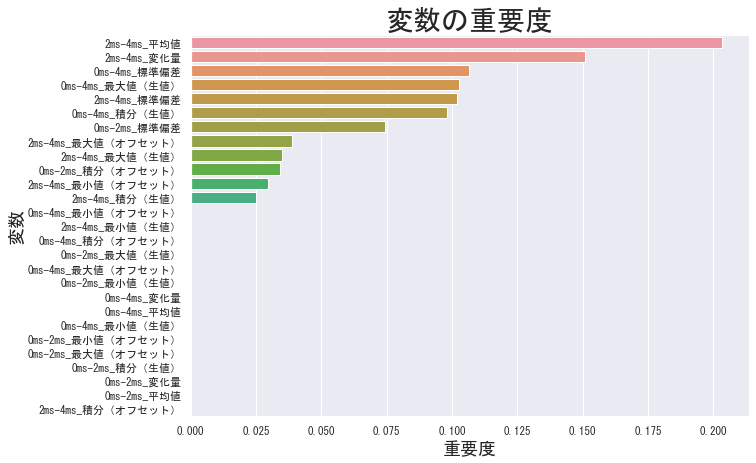

In [78]:
#重要度を可視化（ある特徴量が有用でない場合の精度変化の大きさ＝変化が大きいほど重要度が高い）
importances = random_forest.feature_importances_

importances_list = pd.DataFrame({ '変数' :train_x.columns, '重要度' :importances})
importances_list = importances_list.sort_values(by='重要度', ascending=False)


plt.figure(figsize=(10, 7))

sns.set(font='MS Gothic')
sns.barplot('重要度','変数',data=importances_list,orient='h')
plt.title('変数の重要度',fontsize=28)
plt.ylabel('変数',fontsize=18)
plt.xlabel('重要度',fontsize=18)

In [79]:
df_2 = pd.concat([df,nug], axis=1)

In [80]:
df_N0 = df_2[df_2['クラス'] == 0]
df_N1 = df_2[df_2['クラス'] == 1]

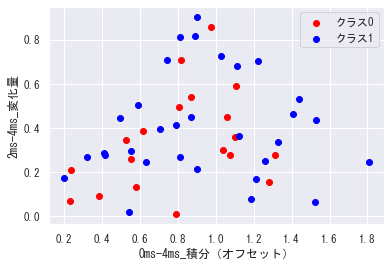

In [81]:
plt.scatter(df_N0['0ms-4ms_積分（オフセット）'], df_N0['2ms-4ms_変化量'], c = 'red', label='クラス0')
plt.scatter(df_N1['0ms-4ms_積分（オフセット）'], df_N1['2ms-4ms_変化量'], c = 'blue', label='クラス1')
plt.ylabel('2ms-4ms_変化量', fontname="MS Gothic")
plt.xlabel('0ms-4ms_積分（オフセット）', fontname="MS Gothic")

plt.legend(prop={"family":"MS Gothic"})
plt.show()

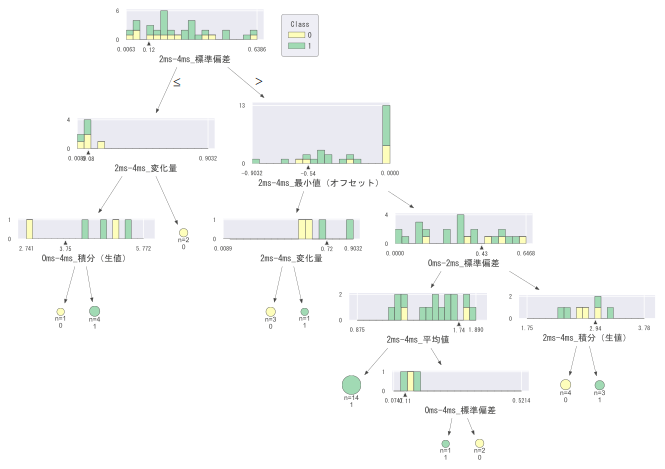

In [82]:
from dtreeviz.trees import dtreeviz
import itertools


viz = dtreeviz(
    random_forest[1],
    train_x.values,
    train_y['クラス'].values,
    feature_names=list(train_x.columns),
    target_name = 'Class',
    class_names=list(["0", "1"]),
    fontname='MS Gothic'
)

viz.save("test.svg")
display(viz)

In [83]:
train_x2 = train_x.loc[:, ['0ms-4ms_積分（オフセット）','2ms-4ms_変化量']]


#木の深さの最大値3、
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(train_x2, train_y)

DecisionTreeClassifier(max_depth=3)

In [84]:
train_x2

,0ms-4ms_積分（オフセット）,2ms-4ms_変化量
7,0.319333,0.268323
42,0.810882,0.269357
47,0.385892,0.092942
48,0.410474,0.286835
16,1.521382,0.067089
10,0.631386,0.247754
17,1.313432,0.276540
25,0.871685,0.540680
35,0.868186,0.448964
32,0.201836,0.173307


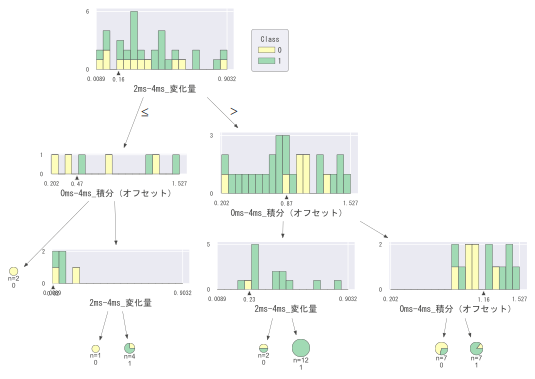

In [85]:
viz = dtreeviz(
    tree,
    train_x2.values,
    train_y['クラス'].values,
    feature_names=list(train_x2.columns),
    target_name = 'Class',
    class_names=list(["0", "1"]),
    fontname='MS Gothic'
)

viz.save("test.svg")
display(viz)